## Setup

In [1]:
%run setup.ipynb

In [15]:
# crude recombination rate lookup, keyed off chromatin state
# use units of cM / bp, assume 2 cM / Mbp == 2x10^-6 cm / bp
tbl_rr = (
    phase1_ar3.tbl_chromatin
    .addfield('rr', lambda row: .6e-6 if 'H' in row.name else 2e-6)
)    
tbl_rr.displayall()

genome = phase1_ar3.genome
chromosomes = '2R', '2L', '3R', '3L', 'X'

# per-base map of recombination rates
recmap = {chrom: np.full(len(genome[chrom]), fill_value=2e-6) for chrom in chromosomes}
for row in tbl_rr.records():
    recmap[row.chrom][row.start-1:row.stop] = row.rr
  
recmap

0|name,1|chrom,2|start,3|stop,4|rr
CHX,X,20009764,24393108,6e-07
CH2R,2R,58984778,61545105,6e-07
CH2L,2L,1,2431617,6e-07
PEU2L,2L,2487770,5042389,2e-06
IH2L,2L,5078962,5788875,6e-07
IH3R,3R,38988757,41860198,6e-07
CH3R,3R,52161877,53200684,6e-07
CH3L,3L,1,1815119,6e-07
PEU3L,3L,1896830,4235209,2e-06
IH3L,3L,4264713,5031692,6e-07


{'2L': array([  6.00000000e-07,   6.00000000e-07,   6.00000000e-07, ...,
          2.00000000e-06,   2.00000000e-06,   2.00000000e-06]),
 '2R': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07]),
 '3L': array([  6.00000000e-07,   6.00000000e-07,   6.00000000e-07, ...,
          2.00000000e-06,   2.00000000e-06,   2.00000000e-06]),
 '3R': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07]),
 'X': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07])}

In [3]:
dtjd = phase1_selection.dTjD_raw
list(dtjd['3R'])

['AOMvsGWA',
 'BFMvsAOM',
 'BFMvsGWA',
 'BFSvsBFM',
 'BFSvsGWA',
 'BFSvsUGS',
 'CMS_savannavsBFS',
 'CMS_savannavsGAS',
 'CMS_savannavsGWA',
 'CMS_savannavsUGS',
 'GASvsAOM',
 'GASvsBFS',
 'GASvsGWA',
 'UGSvsGWA']

In [17]:
df_h12 = phase1_selection.hstats_windowed.reset_index()
df_h12.head()


,chrom,start,stop,AOM,BFM,BFS,CMS,GAS,GNS,GWA,UGS
0,2L,1,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2L,20001,40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2L,40001,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2L,60001,80000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2L,80001,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


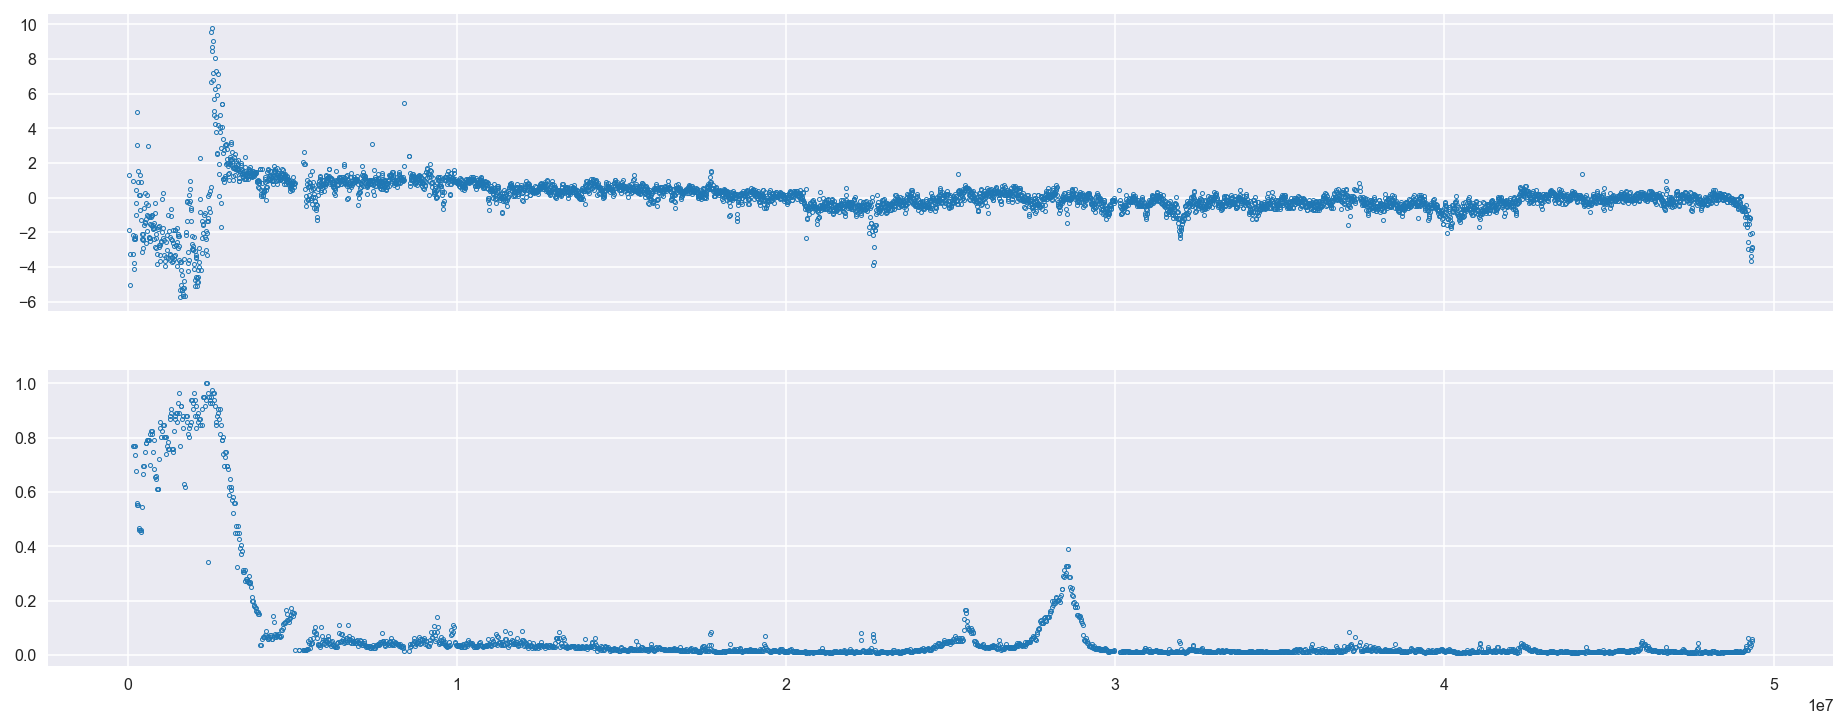

In [18]:
chrom = '2L'
pop = 'BFS'

grp = dtjd[chrom]['{}vsGWA'.format(pop)]
pos = (grp['start'][:] + grp['stop'][:])/2
s = grp['delta_zscore'][:]

fig, axs = plt.subplots(nrows=2, figsize=(16, 6), sharex=True)
ax = axs[0]
ax.plot(pos, s, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5)
ax = axs[1]
starts, stops, gpos, signal = rockies.extract_signal(df_h12, col=pop, chrom=chrom, recmap=recmap)
x = (starts + stops) / 2
y = signal
ax.plot(x, y, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

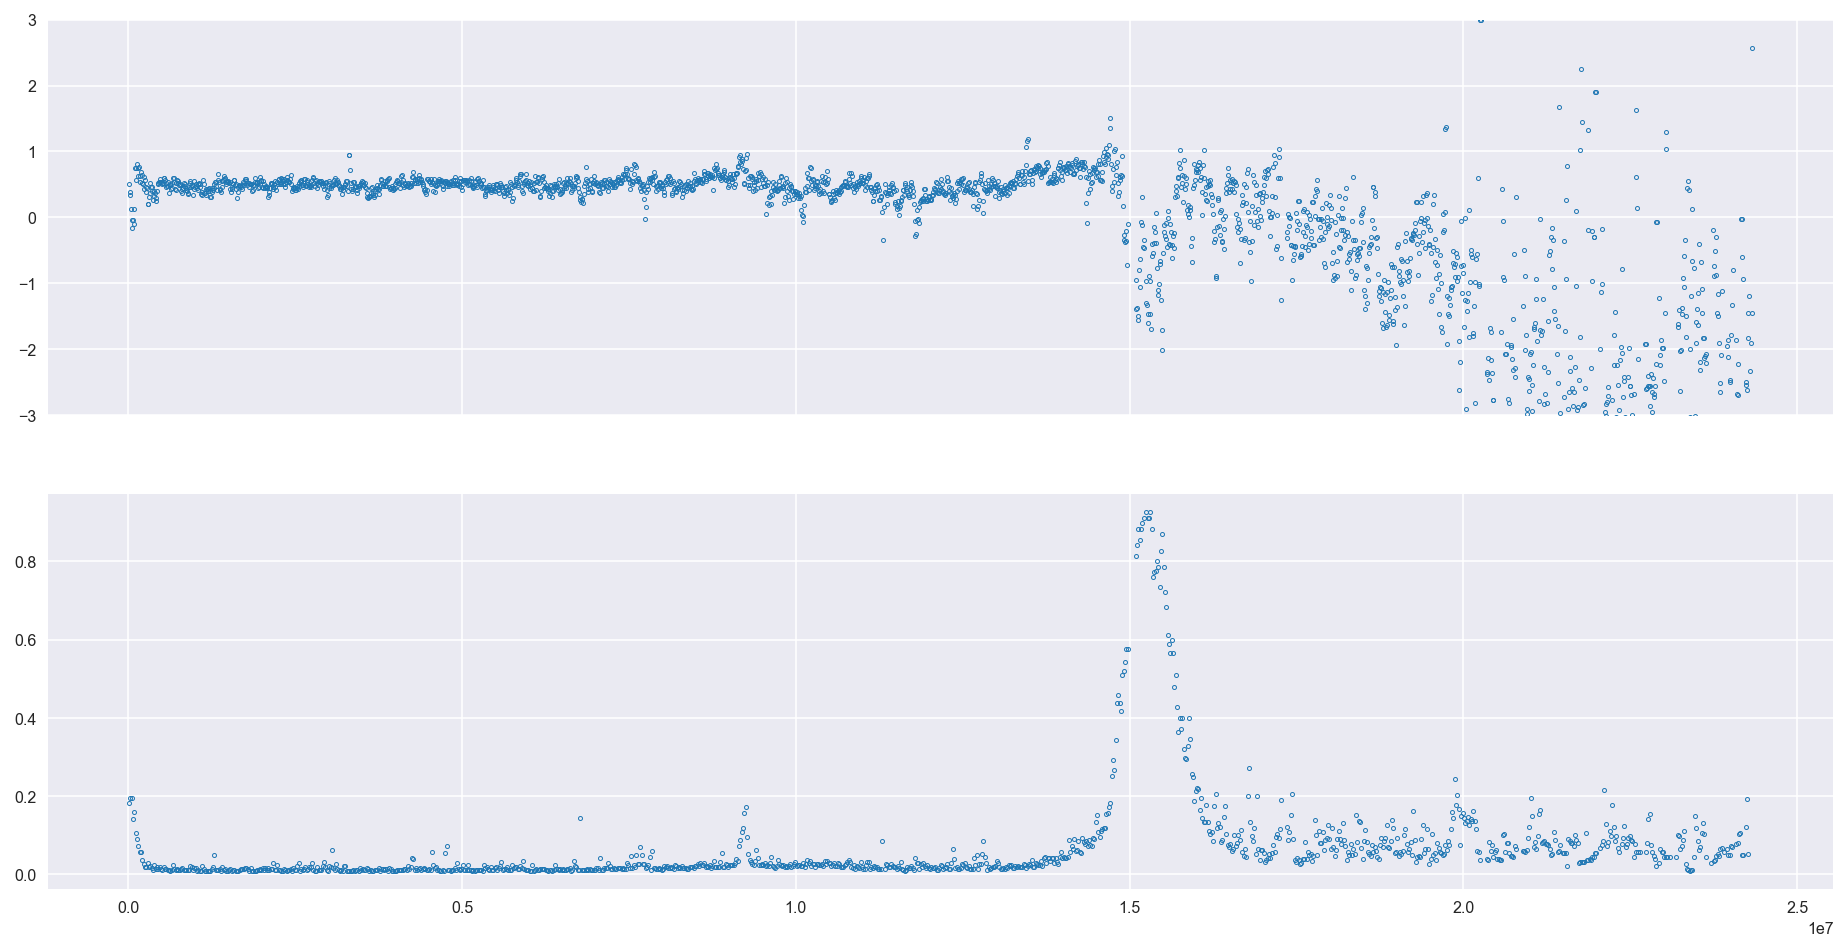

In [24]:
chrom = 'X'
pop = 'BFM'

grp = dtjd[chrom]['{}vsGWA'.format(pop)]
pos = (grp['start'][:] + grp['stop'][:])/2
s = grp['delta_zscore'][:]

fig, axs = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
ax = axs[0]
ax.plot(pos, s, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5)
ax.set_ylim(-3, 3)
ax = axs[1]
starts, stops, gpos, signal = rockies.extract_signal(df_h12, col=pop, chrom=chrom, recmap=recmap)
x = (starts + stops) / 2
y = signal
ax.plot(x, y, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);